# Train

Found 2500 images belonging to 5 classes.
Found 500 images belonging to 5 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Function (None, 7, 7, 1024)        3228864   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              1049600   
_________________________________________________________________
activation (Activation)      (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_______________________________________

C:\Users\user\anaconda3\envs\AIDL\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


78/78 [==============================] - 170s 2s/step - loss: 2.1381 - acc: 0.3466 - val_loss: 0.5319 - val_acc: 0.8300

Epoch 00001: val_acc improved from -inf to 0.83000, saving model to model_saved/Bread-DATASET/MobileNet_1\model-001-0.420400-0.830000.h5


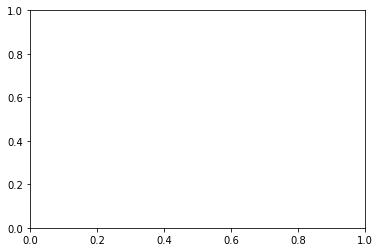

In [1]:
from Keras_train_Bread import * # Keras_train_Bread.py를 불러옵니다

train_path = 'Bread-DATASET/train/' # train 이미지 폴더, 경로 마지막에 반드시 '/'를 기입해야하며합니다.
val_path = 'Bread-DATASET/test/' # validation 이미지 폴더, 
model_name = 'MobileNet' # https://keras.io/api/applications/ 에 있는 모델이름
epoch = 1 # 학습 폴더의 모든 이미지를 한번 돌릴때 1 epoch
batch_size = 32 # 한번에 몇 장의 이미지를 학습할 것인지
learning_rate = 0.0001 # 잘 모르겠으면 1e-4 ~ 1e-6으로 오랜 epoch 돌리면 됩니다
with tf.device('/cpu:0'): # gpu가 있으면 cpu -> gpu로 바꾸세요
    # Transfer learn의 fine tuning 객체를 생성합니다
    fine_tunning = Fine_tunning(train_path = train_path, val_path = val_path,
                                model_name = model_name,
                                epoch = epoch, batch_size = batch_size, learning_rate = learning_rate)
    # 훈련을 시킵니다
    history = fine_tunning.training()
    # 결과를 저장합니다
    fine_tunning.save_accuracy(history)

# Test

In [2]:
import pandas as pd
from sklearn import metrics
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

name = 'Bread'
modelPath = 'model_saved/Bread-DATASET/MobileNet_1/model-001-0.420400-0.830000.h5' # Test weight 경로 직접 입력

# weight = 'model-078-0.925417-0.916944.h5'        # 학습된 모델의 파일이름
test_Path = 'Bread-DATASET/test/'#'e:/hackathon/entropion/val' # 테스트 이미지 폴더
#dataset 이후 Skin 혹은 Eye로 데이터셋 변경이 가능하며, 그 이후 디렉토리 구조는 동일합니다.

# model = load_model(modelPath + weight)
model = load_model(modelPath)
datagen_test = ImageDataGenerator(rescale=1./255)

generator_test = datagen_test.flow_from_directory(directory=test_Path,
                                                  target_size=(224, 224),
                                                  interpolation='bilinear', # 훈련시 포함했으므로 반드시 포함
                                                  batch_size=32,
                                                  shuffle=False)

# model로 test set 추론
generator_test.reset()
cls_test = generator_test.classes
cls_pred = model.predict_generator(generator_test, verbose=1, workers=0)
cls_pred_argmax = cls_pred.argmax(axis=1)

# 결과 산출 및 저장
report = metrics.classification_report(y_true=cls_test, y_pred=cls_pred_argmax, output_dict=True)
report = pd.DataFrame(report).transpose()
#report.to_csv(f'e:/output/report_test_{name}.csv', index=True, encoding='cp949')
report.to_csv(f'report_test_{name}.csv', index=True, encoding='cp949') # 원하는 위치로 변경
print(report)

Found 500 images belonging to 5 classes.


C:\Users\user\anaconda3\envs\AIDL\lib\site-packages\tensorflow\python\keras\engine\training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


16/16 [==============================] - 44s 501ms/step
              precision  recall  f1-score  support
0              0.764706    0.78  0.772277   100.00
1              0.801887    0.85  0.825243   100.00
2              0.829787    0.78  0.804124   100.00
3              0.854545    0.94  0.895238   100.00
4              0.909091    0.80  0.851064   100.00
accuracy       0.830000    0.83  0.830000     0.83
macro avg      0.832003    0.83  0.829589   500.00
weighted avg   0.832003    0.83  0.829589   500.00
